In [2]:
import os

target_path = '/Users/NUS/DSS5104/src'

os.makedirs(target_path, exist_ok=True)

In [3]:
os.chdir(target_path)
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: c:\Users\NUS\DSS5104\src


# 1. Import Packages 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 2. Initial Data Exploration

In [5]:
df = pd.read_csv("../data/house_dataset.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.shape

(9200, 18)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,9.200000e+03,9200.000000,9200.000000,9200.000000,9.200000e+03,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,5.519630e+05,3.400870,2.160815,2139.225217,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638041e+05,0.908799,0.783738,963.131107,3.588249e+04,0.538259,0.084399,0.778362,0.677193,862.122114,464.112000,29.730232,979.361300
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9200 non-null   object 
 1   price          9200 non-null   float64
 2   bedrooms       9200 non-null   float64
 3   bathrooms      9200 non-null   float64
 4   sqft_living    9200 non-null   int64  
 5   sqft_lot       9200 non-null   int64  
 6   floors         9200 non-null   float64
 7   waterfront     9200 non-null   int64  
 8   view           9200 non-null   int64  
 9   condition      9200 non-null   int64  
 10  sqft_above     9200 non-null   int64  
 11  sqft_basement  9200 non-null   int64  
 12  yr_built       9200 non-null   int64  
 13  yr_renovated   9200 non-null   int64  
 14  street         9200 non-null   object 
 15  city           9200 non-null   object 
 16  statezip       9200 non-null   object 
 17  country        9200 non-null   object 
dtypes: float

# 3. Data Cleaning

### 3.1 Correction of Data Type

In [9]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [10]:
# convert the data columns to the appropriate data types
df['date'] = pd.to_datetime(df['date'])

In [11]:
# convert to categorical
for col in ['waterfront', 'view', 'condition']:
    df[col] = df[col].astype('category')

### 3.2 General cleaning


In [12]:
# Remove rows with price equal to 0
df = df[df['price'] > 0]

In [13]:
# Remove rows with bedrooms equal to 0
df = df[df['bedrooms'] > 0]

In [14]:
# Create a new column 'renovated' to indicate if the house has been renovated
df['renovated'] = (df['yr_renovated'] > 0).astype(int)

In [15]:
# Extract the year from the date column
df['year'] = df['date'].dt.year

In [16]:
# Check the unique values in the 'year' column
df['year'].unique()

array([2014])

In [17]:
# drop the year column
df.drop(columns=['year'], inplace=True)

In [18]:
#create a new column 'age' to indicate the age of the house
df['age'] = 2014 - df['yr_built']

In [19]:
# Check Column Relationships 
print("The relationship between sqft_living and 'sqft_above + sqft_basement':")
print((df['sqft_living'] == (df['sqft_above'] + df['sqft_basement'])).value_counts())

The relationship between sqft_living and 'sqft_above + sqft_basement':
True     9096
False       2
Name: count, dtype: int64


In [20]:
# Eliminate rows where sqft_living is not equal to sqft_above + sqft_basement
df = df[df['sqft_living'] == df['sqft_above'] + df['sqft_basement']]

In [21]:
# create a new column 'total_area' to indicate the total area of the house
df['total_area'] = df['sqft_living'] + df['sqft_basement']

In [22]:
# create a new column 'price_per_sqft' to indicate the price per square foot
df['price_per_sqft'] = df['price'] / df['total_area']

In [23]:
# Extract the zipcode
df['zipcode'] = df['statezip'].str.extract(r'(\d{5})')
df['zipcode'] = df['zipcode'].astype('category')
# Drop the statezip column
df.drop(columns=['statezip'], inplace=True)

In [24]:
# Drop irrelevant columns 
df.drop(columns=['country', 'street'], inplace=True)

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,renovated,age,total_area,price_per_sqft,zipcode
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,1,59,1340,233.582090,98133
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,0,93,3930,606.615776,98119
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,0,48,1930,177.202073,98042
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,0,51,3000,140.000000,98008
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,1,38,2740,200.729927,98052


### 3.3 Check for Missing Values

In [26]:
df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
city              0
renovated         0
age               0
total_area        0
price_per_sqft    0
zipcode           0
dtype: int64

# 4. EDA 

In [27]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

### 4.1 Target Variable

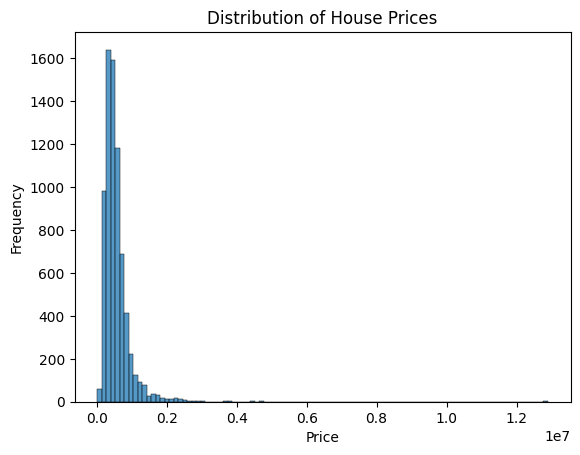

In [28]:
# Check the distribution of the target variable 'price'
sns.histplot(train_df['price'], bins=100)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### 4.2 Log Transformation of the Target Variable

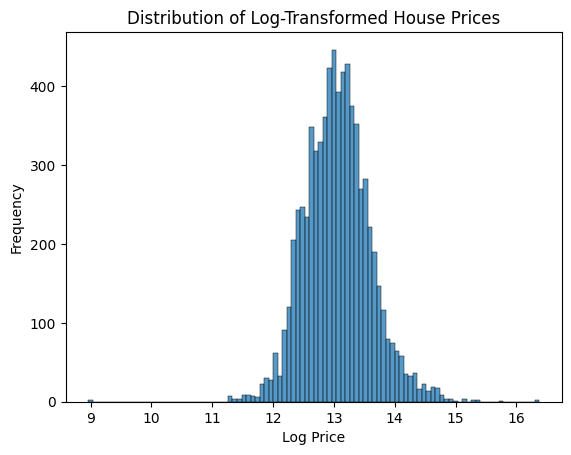

In [29]:
# log-transform the target variable 'price' to reduce skewness
train_df['log_price'] = np.log(df['price'])
test_df['log_price'] = np.log(df['price'])
# Check the distribution of the log-transformed target variable 'log_price'
sns.histplot(train_df['log_price'], bins=100)
plt.title("Distribution of Log-Transformed House Prices")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

In [30]:
train_df['log_price_per_sqft'] = train_df['log_price'] / train_df['total_area']
test_df['log_price_per_sqft'] = test_df['log_price'] / test_df['total_area']

In [31]:
train_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,city,renovated,age,total_area,price_per_sqft,zipcode,log_price,log_price_per_sqft
8068,2014-06-26,339000.0,2.0,1.00,950,7954,1.0,0,0,4,...,1941,1998,Seattle,1,73,950,356.842105,98108,12.733755,0.013404
4024,2014-07-07,437000.0,3.0,1.75,2220,17568,1.0,0,0,4,...,1967,0,Woodinville,0,47,2220,196.846847,98072,12.987688,0.005850
7569,2014-06-20,681500.0,5.0,2.75,3260,11700,1.0,0,0,3,...,1964,2000,Bellevue,1,50,4890,139.366053,98008,13.432052,0.002747
3395,2014-06-25,425000.0,3.0,2.50,2320,2267,3.0,0,0,3,...,2009,0,Seattle,0,5,2320,183.189655,98177,12.959844,0.005586
5047,2014-05-09,252500.0,3.0,1.00,1030,6127,1.0,0,0,3,...,1947,2012,Seattle,1,67,1180,213.983051,98125,12.439167,0.010542


### 4.2 Numerical Features

In [32]:
# create a new column 'log_price_per_sqft' to indicate the log_price per square foot
train_df['log_price_per_sqft'] = train_df['log_price'] / train_df['total_area']
test_df['log_price_per_sqft'] = test_df['log_price'] / test_df['total_area']

In [33]:
numerical_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'age', 'total_area', 'log_price_per_sqft']

#### 4.2.1 Check for outliers

In [34]:
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((data[column] < lower) | (data[column] > upper)).sum()
    return outlier_count

# Apply to all  numerical features
for col in numerical_features:
    outliers = count_outliers_iqr(train_df, col)
    print(f"{col}: {outliers} outliers")

bedrooms: 173 outliers
bathrooms: 212 outliers
sqft_living: 206 outliers
sqft_lot: 873 outliers
floors: 0 outliers
sqft_above: 180 outliers
sqft_basement: 127 outliers
yr_built: 0 outliers
yr_renovated: 0 outliers
age: 0 outliers
total_area: 193 outliers
log_price_per_sqft: 260 outliers


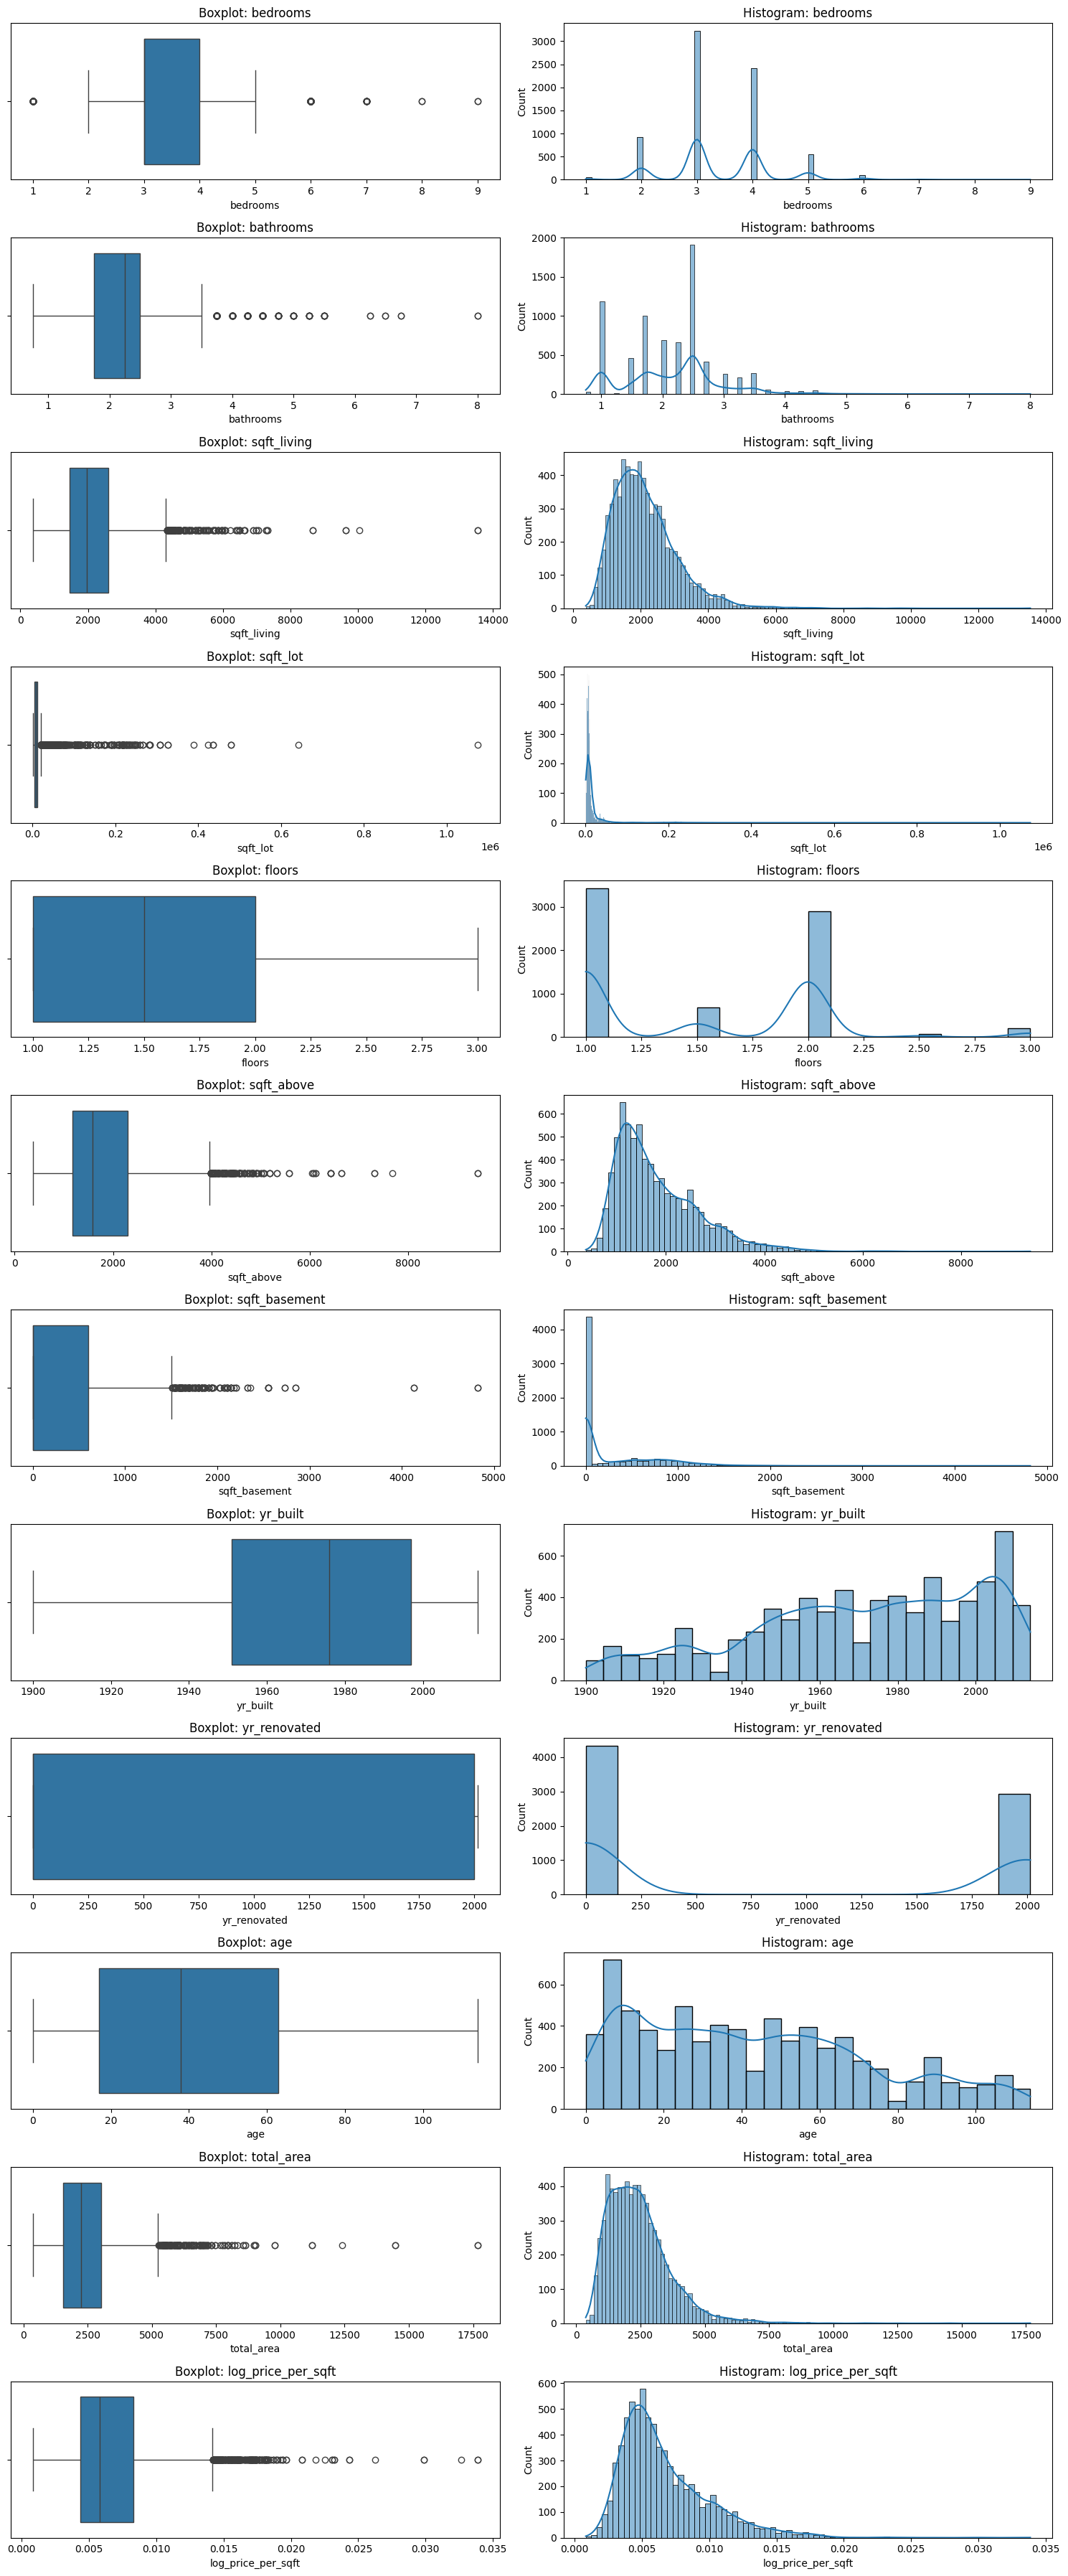

In [35]:
def visualize_outliers(train_df, features):
    plt.figure(figsize=(15, len(features)*3))
    
    for i, feature in enumerate(features):
        # Create subplots for boxplot(left) and histogram(right)
        plt.subplot(len(features), 2, i*2+1)
        sns.boxplot(x=train_df[feature])
        plt.title(f'Boxplot: {feature}')
        plt.tight_layout()
        
        plt.subplot(len(features), 2, i*2+2)
        sns.histplot(train_df[feature], kde=True)
        plt.title(f'Histogram: {feature}')
        plt.tight_layout()
    
    plt.show()

# IQR Method
def analyze_outliers_iqr(train_df, features):
    outlier_stats = {}
    
    for feature in features:
        Q1 = train_df[feature].quantile(0.25)
        Q3 = train_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]
        outlier_percentage = len(outliers) / len(train_df) * 100
        
        outlier_stats[feature] = {
            'count': len(outliers),
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min': train_df[feature].min(),
            'max': train_df[feature].max()
        }
    
    # Create a DataFrame for better visualization
    stats_df = pd.DataFrame.from_dict(outlier_stats, orient='index')
    return stats_df


visualize_outliers(train_df, numerical_features)

In [36]:
# IQR Method
outlier_stats = analyze_outliers_iqr(train_df, numerical_features)
print("\nOutlier Analysis Result(IQR method):")
print(outlier_stats)

# Obtaining the outlier statistics for each feature
top_outlier_features = outlier_stats.sort_values(by='percentage', ascending=False)
print("\nOutlier Percentage :")
print(top_outlier_features[['count', 'percentage']])


Outlier Analysis Result(IQR method):
                    count  percentage  lower_bound   upper_bound          min  \
bedrooms              173    2.377680     1.500000      5.500000     1.000000   
bathrooms             212    2.913689     0.625000      3.625000     0.750000   
sqft_living           206    2.831226  -250.000000   4310.000000   370.000000   
sqft_lot              873   11.998351 -3863.125000  19771.875000   638.000000   
floors                  0    0.000000    -0.500000      3.500000     1.000000   
sqft_above            180    2.473887  -500.000000   3980.000000   370.000000   
sqft_basement         127    1.745465  -900.000000   1500.000000     0.000000   
yr_built                0    0.000000  1882.000000   2066.000000  1900.000000   
yr_renovated            0    0.000000 -2998.500000   4997.500000     0.000000   
age                     0    0.000000   -52.000000    132.000000     0.000000   
total_area            193    2.652556  -695.000000   5265.000000   370.

In [37]:
# skewness handling
for col in ['sqft_living', 'sqft_lot', 'total_area']:
    train_df[f'log_{col}'] = np.log1p(train_df[col])
    
for col in ['sqft_living', 'sqft_lot', 'total_area']:
    test_df[f'log_{col}'] = np.log1p(test_df[col])

In [38]:
# Capping the outliers
for col in ['log_price_per_sqft', 'bedrooms', 'bathrooms']:
    upper_limit = train_df[col].quantile(0.99)
    train_df[f'{col}_capped'] = train_df[col].clip(upper=upper_limit)
    test_df[f'{col}_capped'] = test_df[col].clip(upper=upper_limit)

In [39]:
train_df['years_since_renovation'] = train_df.apply(
    lambda x: x['date'].year - x['yr_renovated'] if x['yr_renovated'] > 0 else x['date'].year - x['yr_built'], 
    axis=1)
test_df['years_since_renovation'] = test_df.apply(
    lambda x: x['date'].year - x['yr_renovated'] if x['yr_renovated'] > 0 else x['date'].year - x['yr_built'],
    axis=1)

In [40]:
# living area / lot size
train_df['ratio_living_to_lot'] = train_df['sqft_living'] / train_df['sqft_lot']
test_df['ratio_living_to_lot'] = test_df['sqft_living'] / test_df['sqft_lot']

# sqft_basement / sqft_living
train_df['ratio_basement'] = train_df.apply(lambda x: x['sqft_basement'] / x['sqft_living'] if x['sqft_living'] > 0 else 0, axis=1)
test_df['ratio_basement'] = test_df.apply(lambda x: x['sqft_basement'] / x['sqft_living'] if x['sqft_living'] > 0 else 0, axis=1)

# average room size
train_df['avg_room_size'] = train_df.apply(lambda x: x['sqft_living'] / x['bedrooms'] if x['bedrooms'] > 0 else 0, axis=1)
test_df['avg_room_size'] = test_df.apply(lambda x: x['sqft_living'] / x['bedrooms'] if x['bedrooms'] > 0 else 0, axis=1)

In [41]:
print(train_df.shape)
print(test_df.shape)

(7276, 32)
(1820, 32)


### 4.3 Categorical Features


In [42]:
categorical_features = ['waterfront', 'view', 'condition', 'renovated', 'city', 'zipcode']

In [43]:
# Binary encoding for 'waterfront' and 'renovated'
train_df['waterfront'] = train_df['waterfront'].map({0: 'No', 1: 'Yes'}).astype('category')
train_df['renovated'] = train_df['renovated'].astype('category')

In [44]:
test_df['waterfront'] = test_df['waterfront'].map({0: 'No', 1: 'Yes'}).astype('category')
test_df['renovated'] = test_df['renovated'].astype('category')

In [45]:
# view & condition are oridinal categorical features
# view (0-4): 0 represents no view，4 represents the best view
# condition (1-5): 1 means the worst condition, 5 means the best condition

# Create a mapping for view and condition
view_mapping = {
    0: 'None', 
    1: 'Fair', 
    2: 'Average', 
    3: 'Good', 
    4: 'Excellent'
}
train_df['view'] = train_df['view'].map(view_mapping).astype('category')
test_df['view'] = test_df['view'].map(view_mapping).astype('category')

condition_mapping = {
    1: 'Poor', 
    2: 'Fair', 
    3: 'Average', 
    4: 'Good', 
    5: 'Excellent'
}
train_df['condition'] = train_df['condition'].map(condition_mapping).astype('category')
test_df['condition'] = test_df['condition'].map(condition_mapping).astype('category')

In [46]:
# Setting the order for categorical features
train_df['view'] = train_df['view'].cat.set_categories(['None', 'Fair', 'Average', 'Good', 'Excellent'], ordered=True)
train_df['condition'] = train_df['condition'].cat.set_categories(['Poor', 'Fair', 'Average', 'Good', 'Excellent'], ordered=True)

In [47]:
test_df['view'] = test_df['view'].cat.set_categories(['None', 'Fair', 'Average', 'Good', 'Excellent'], ordered=True)
test_df['condition'] = test_df['condition'].cat.set_categories(['Poor', 'Fair', 'Average', 'Good', 'Excellent'], ordered=True)

In [48]:
# Check the total number of unique values in categorical features
print(f"Number of unique cities: {train_df['city'].nunique()}")
print(f"Number of unique zipcodes: {train_df['zipcode'].nunique()}")


Number of unique cities: 44
Number of unique zipcodes: 77


In [49]:
# keep cities with more than 100 samples, classify the rest as 'other'
city_counts = train_df['city'].value_counts()
top_cities = city_counts[city_counts > 100].index.tolist()  
train_df['city_processed'] = train_df['city'].apply(lambda x: x if x in top_cities else 'Other')
train_df['city_processed'] = train_df['city_processed'].astype('category')

test_df['city_processed'] = test_df['city'].apply(lambda x: x if x in top_cities else 'Other')
test_df['city_processed'] = test_df['city_processed'].astype('category')

In [50]:
# Zipcode handling
zipcode_counts = train_df['zipcode'].value_counts()
top_zipcodes = zipcode_counts[zipcode_counts > 50].index.tolist()  
train_df['zipcode_top'] = train_df['zipcode'].apply(lambda x: x if x in top_zipcodes else 'Other')
train_df['zipcode_top'] = train_df['zipcode_top'].astype('category')

test_df['zipcode_top'] = test_df['zipcode'].apply(lambda x: x if x in top_zipcodes else 'Other')
test_df['zipcode_top'] = test_df['zipcode_top'].astype('category')

In [51]:
print(top_cities)
print(top_zipcodes)

['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Kirkland', 'Kent', 'Issaquah', 'Sammamish', 'Auburn', 'Federal Way', 'Shoreline', 'Woodinville', 'Maple Valley', 'Mercer Island', 'Burien', 'Snoqualmie', 'Kenmore']
['98103', '98052', '98117', '98115', '98059', '98006', '98034', '98042', '98038', '98058', '98074', '98133', '98027', '98023', '98053', '98033', '98125', '98155', '98029', '98075', '98126', '98056', '98092', '98144', '98040', '98118', '98065', '98004', '98168', '98122', '98001', '98199', '98072', '98112', '98028', '98031', '98106', '98116', '98166', '98198', '98136', '98177', '98077', '98107', '98119', '98105', '98178', '98146', '98045', '98003', '98008', '98030', '98019', '98108', '98007', '98002', '98005']


In [52]:
print(len(top_cities))
print(len(top_zipcodes))

17
57


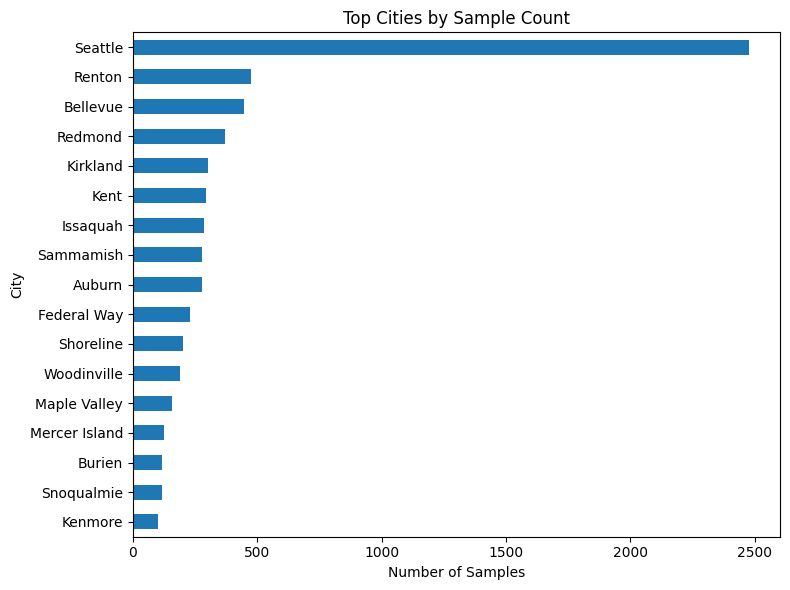

In [53]:
import matplotlib.pyplot as plt

# Visualize the top 20 cities with the most samples
city_counts.loc[top_cities].sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,6))
plt.title("Top Cities by Sample Count")
plt.xlabel("Number of Samples")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Interaction Terms

In [54]:
train_df['premium_property'] = ((train_df['view'] == 'Excellent') & (train_df['waterfront'] == 'Yes')).astype(int)
test_df['premium_property'] = ((test_df['view'] == 'Excellent') & (test_df['waterfront'] == 'Yes')).astype(int)

### One-hot encoding

In [55]:
train_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,log_price_per_sqft_capped,bedrooms_capped,bathrooms_capped,years_since_renovation,ratio_living_to_lot,ratio_basement,avg_room_size,city_processed,zipcode_top,premium_property
8068,2014-06-26,339000.0,2.0,1.00,950,7954,1.0,No,None,Good,...,0.013404,2.0,1.00,16,0.119437,0.000000,475.000000,Seattle,98108,0
4024,2014-07-07,437000.0,3.0,1.75,2220,17568,1.0,No,None,Good,...,0.005850,3.0,1.75,47,0.126366,0.000000,740.000000,Woodinville,98072,0
7569,2014-06-20,681500.0,5.0,2.75,3260,11700,1.0,No,None,Average,...,0.002747,5.0,2.75,14,0.278632,0.500000,652.000000,Bellevue,98008,0
3395,2014-06-25,425000.0,3.0,2.50,2320,2267,3.0,No,None,Average,...,0.005586,3.0,2.50,5,1.023379,0.000000,773.333333,Seattle,98177,0
5047,2014-05-09,252500.0,3.0,1.00,1030,6127,1.0,No,None,Average,...,0.010542,3.0,1.00,2,0.168108,0.145631,343.333333,Seattle,98125,0


In [56]:
categorical_cols = ['waterfront', 'view', 'condition', 'renovated', 'city_processed', 'zipcode_top']

In [57]:
# Train data encoding - One-Hot Encoding for categorical features
train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Test data encoding - One-Hot Encoding for categorical features
test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

In [58]:
train_encoded.shape, test_encoded.shape

((7276, 113), (1820, 113))

In [59]:
train_encoded.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,zipcode_top_98144,zipcode_top_98146,zipcode_top_98155,zipcode_top_98166,zipcode_top_98168,zipcode_top_98177,zipcode_top_98178,zipcode_top_98198,zipcode_top_98199,zipcode_top_Other
8068,2014-06-26,339000.0,2.0,1.00,950,7954,1.0,950,0,1941,...,False,False,False,False,False,False,False,False,False,False
4024,2014-07-07,437000.0,3.0,1.75,2220,17568,1.0,2220,0,1967,...,False,False,False,False,False,False,False,False,False,False
7569,2014-06-20,681500.0,5.0,2.75,3260,11700,1.0,1630,1630,1964,...,False,False,False,False,False,False,False,False,False,False
3395,2014-06-25,425000.0,3.0,2.50,2320,2267,3.0,2320,0,2009,...,False,False,False,False,False,True,False,False,False,False
5047,2014-05-09,252500.0,3.0,1.00,1030,6127,1.0,880,150,1947,...,False,False,False,False,False,False,False,False,False,False


# 5. Remove unnecessary features

### 5.1 Check correlation between features and target variable

In [60]:
# Calculate the correlation matrix for numerical features
corr_with_target = train_encoded.select_dtypes(include=['float64', 'int64']).corr()['log_price'].sort_values(ascending=False)
print("Top 20 features correlated with log_price:")
print(corr_with_target.head(20))

# Set the threshold for high correlation
high_corr_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()

Top 20 features correlated with log_price:
log_price              1.000000
price                  0.821671
sqft_living            0.678058
log_sqft_living        0.671100
log_total_area         0.645215
total_area             0.644278
sqft_above             0.588900
avg_room_size          0.574693
bathrooms              0.555679
bathrooms_capped       0.552694
price_per_sqft         0.449744
bedrooms_capped        0.370246
bedrooms               0.368671
sqft_basement          0.319370
floors                 0.305711
ratio_living_to_lot    0.189955
ratio_basement         0.167328
log_sqft_lot           0.123839
sqft_lot               0.093319
yr_built               0.063948
Name: log_price, dtype: float64


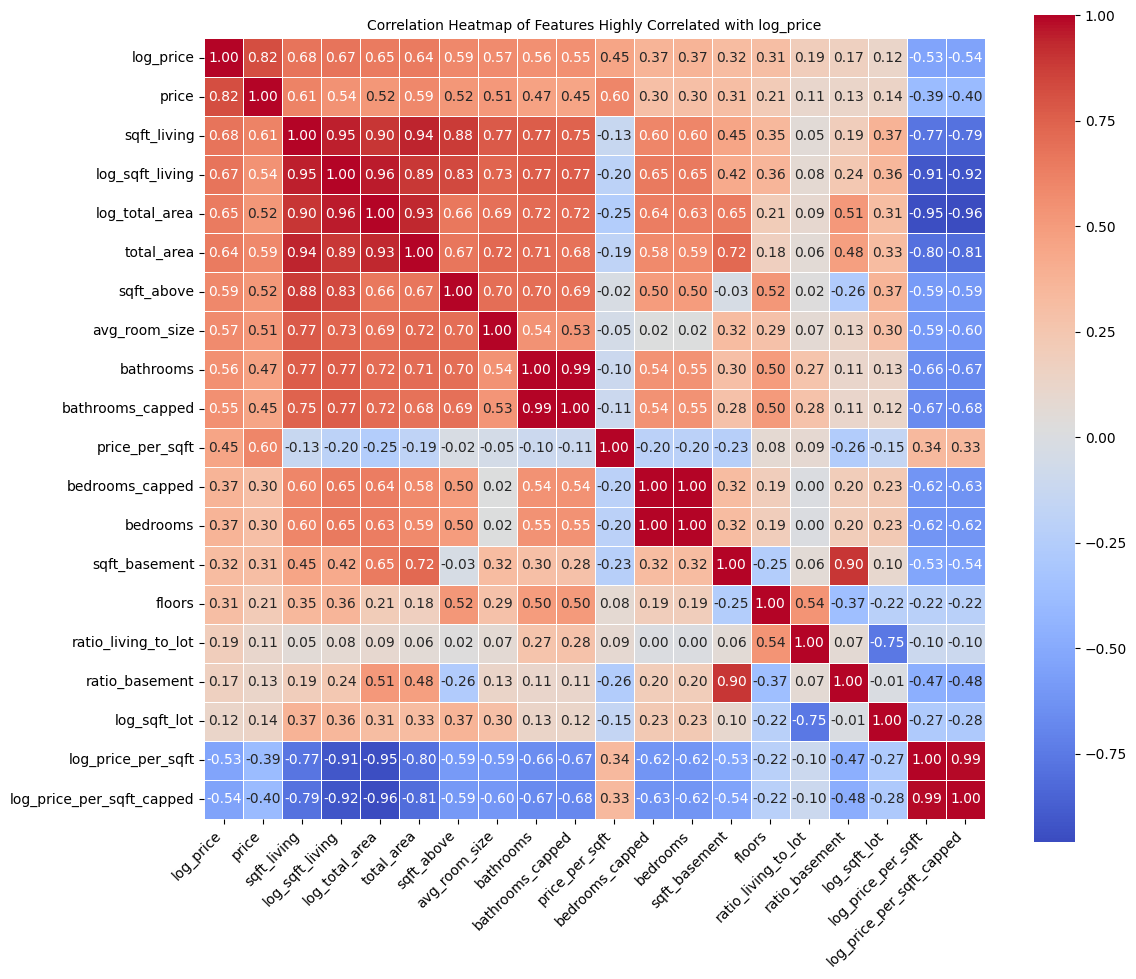

In [61]:
corr_matrix = train_encoded[high_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features Highly Correlated with log_price", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.2 Calculate VIF for each feature

In [62]:
# Choose features with high correlation with the target variable
X = train_encoded[high_corr_features].select_dtypes(include=['float64', 'int64'])
X = sm.add_constant(X) 

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values('VIF', ascending=False))

# Remove features with high VIF (> 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

                      feature           VIF
3                 sqft_living           inf
6                  total_area           inf
7                  sqft_above           inf
14              sqft_basement           inf
0                       const  7.239480e+04
5              log_total_area  7.166644e+03
4             log_sqft_living  5.083011e+03
17             ratio_basement  6.245705e+02
12            bedrooms_capped  1.527721e+02
9                   bathrooms  1.521273e+02
10           bathrooms_capped  1.489681e+02
13                   bedrooms  1.460073e+02
20  log_price_per_sqft_capped  9.215085e+01
19         log_price_per_sqft  6.891053e+01
8               avg_room_size  2.159607e+01
2                       price  1.029561e+01
11             price_per_sqft  9.562427e+00
1                   log_price  6.651075e+00
16        ratio_living_to_lot  4.730009e+00
18               log_sqft_lot  4.052965e+00
15                     floors  2.919164e+00


In [63]:
# Remove features with infinite or very high VIF
features_to_remove = ['sqft_living', 'total_area', 'sqft_above', 'sqft_basement', 'log_total_area']

# From highly correlated feature pairs, keep only one
features_to_remove += ['bedrooms', 'bathrooms', 'log_price_per_sqft']

# Execute removal
train_reduced = train_encoded.drop(features_to_remove, axis=1)
test_reduced = test_encoded.drop(features_to_remove, axis=1)

### 5.3 KNN Imputation

In [64]:
# Select key features for similarity calculation
knn_features = ['log_sqft_living', 'bedrooms_capped', 'bathrooms_capped']
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df[knn_features])
test_scaled = scaler.transform(test_df[knn_features])

# Fit KNN model
k = 5
knn = NearestNeighbors(n_neighbors=k+1)
knn.fit(train_scaled)

# Calculate KNN features
distances, indices = knn.kneighbors(train_scaled)
train_df['knn_avg_price'] = [train_df.iloc[indices[i, 1:k+1]]['price'].mean() for i in range(len(train_df))]

distances_test, indices_test = knn.kneighbors(test_scaled)
test_df['knn_avg_price'] = [train_df.iloc[indices_test[i, :k]]['price'].mean() for i in range(len(test_df))]

# Add new features to the dataset
train_reduced['knn_avg_price'] = train_df['knn_avg_price']
test_reduced['knn_avg_price'] = test_df['knn_avg_price']

### 5.4 Interactions and Quadratic Terms

In [65]:
# Simple interaction terms and quadratic terms
train_reduced['bed_bath_interact'] = train_reduced['bedrooms_capped'] * train_reduced['bathrooms_capped']
test_reduced['bed_bath_interact'] = test_reduced['bedrooms_capped'] * test_reduced['bathrooms_capped']

# Age and condition interaction (older houses in good condition are more valuable)
train_reduced['condition_age_interact'] = train_reduced['age'] * (train_reduced['condition_Excellent'].astype(int) * 5 + 
                                                           train_reduced['condition_Good'].astype(int) * 4 + 
                                                           train_reduced['condition_Average'].astype(int) * 3)
test_reduced['condition_age_interact'] = test_reduced['age'] * (test_reduced['condition_Excellent'].astype(int) * 5 + 
                                                         test_reduced['condition_Good'].astype(int) * 4 + 
                                                         test_reduced['condition_Average'].astype(int) * 3)

In [66]:
# Check final feature counts
print(f"Original feature count: {train_encoded.shape[1]}")
print(f"Reduced feature count: {train_reduced.shape[1]}")
print(f"Final count after adding features: {train_reduced.shape[1]}")

Original feature count: 113
Reduced feature count: 108
Final count after adding features: 108


In [67]:
# Save processed data
train_final = train_reduced.copy()
test_final = test_reduced.copy()

In [71]:
train_final.dtypes.full

AttributeError: 'Series' object has no attribute 'full'